<a href="https://colab.research.google.com/github/Seghelicious/Analytics-Intelligence/blob/main/Analytics_Intelligence_Prediction_of_Students'_Test_Scores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

The goal of this assessment is to build a predictive model to predict the test score of each student. This is a data-set of 9880 students and their grades, attendance and gender.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Import Required Libraries**

In [ ]:
# Data Manipulation libraries
import pandas as pd
import numpy as np

# Visualisation libraries
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot
from matplotlib import style
plt.style.use('ggplot')
import itertools
import warnings
warnings.filterwarnings('ignore')


# Preprocessing libraries
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split 


# Model Development libraries
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Model Evaluation libraries
from sklearn.metrics import mean_squared_error

In [ ]:
AI_data = pd.read_csv('/content/drive/MyDrive/Analytics Intelligence/Students.csv')
AI_data.head()

,ID,Gender,Age,StudentId,Attendance,TestScore
0,0,male,58,81 gn,0.81,64.76
1,1,male,54,02 Wd,0.55,35.11
2,2,male,50,83 Kc,0.62,60.24
3,3,male,34,43 RB,0.84,69.97
4,4,male,58,61 sy,0.59,36.89


In [ ]:
# Check for missing values

AI_data.isna().sum()

ID            0
Gender        0
Age           0
StudentId     0
Attendance    0
TestScore     0
dtype: int64

In [ ]:
AI_data.shape

(9880, 6)

# **Exploratory Data Analysis**

Check summary statistics of the Students' data.

In [ ]:
AI_data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,9880,NaN,NaN,NaN,4999.21,2884.24,0,2503.75,5002.5,7493.25,9999
Gender,9880,2,male,4954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,9880,NaN,NaN,NaN,49.3672,14.9757,1,39,49,60,100
StudentId,9880,9692,01 vQ,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Attendance,9880,NaN,NaN,NaN,0.730917,0.151874,0.15,0.63,0.75,0.85,1
TestScore,9880,NaN,NaN,NaN,63.0895,17.7364,0.01,51.6775,64.44,76.15,99.95


## **Age**

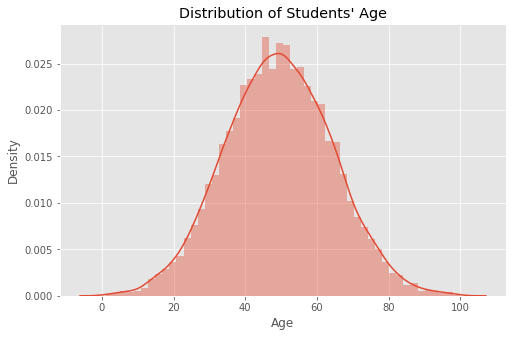

In [ ]:
plt.figure(figsize = (8, 5))
plt.title('Distribution of Students\' Age')
sns.distplot(AI_data['Age'])

The Age variable follows a normal distribution. The mean age is 49 years. This follows that most of the Students are aged between 39 and 60.

## **Attendance**

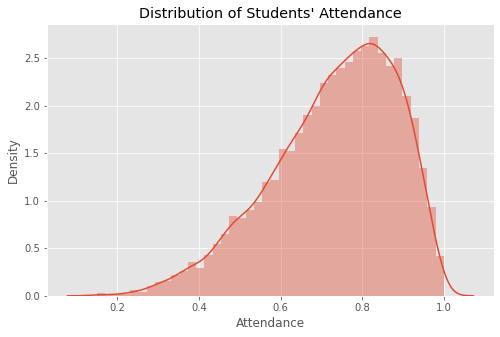

In [ ]:
plt.figure(figsize = (8, 5))
plt.title('Distribution of Students\' Attendance')
sns.distplot(AI_data['Attendance'])

The distribution of Students' Attendance is left-skewed (mean < median < mode). This follows that most of the students have an average attendance greater than 75%. 

## **Test Scores**

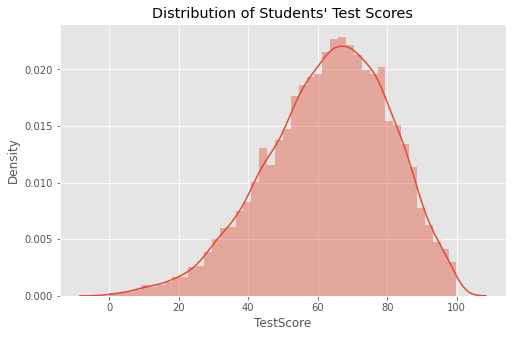

In [ ]:
plt.figure(figsize = (8, 5))
plt.title('Distribution of Students\' Test Scores')
sns.distplot(AI_data['TestScore'])

The distribution of Students' TestScores is left-skewed (mean < median < mode). This implies that less than 25% of the students scored below 51%.

## **Gender**

In [ ]:
AI_data['Gender'].value_counts()

male      4954
female    4926
Name: Gender, dtype: int64

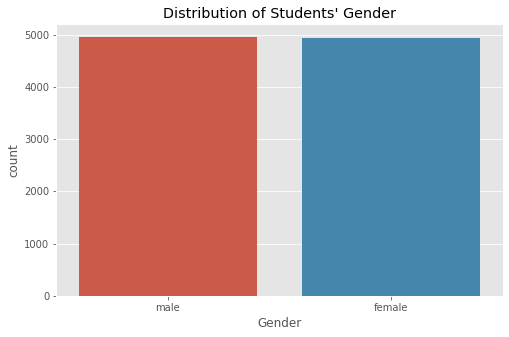

In [ ]:
plt.figure(figsize = (8, 5))
plt.title('Distribution of Students\' Gender')
sns.countplot(AI_data['Gender'])

The gender distribution of students is mostly equittably distributed (4954 males to 4926 females).

# **Handling Outliers/ Extreme values**

### **Age**

In [ ]:
AI_data['Age'].describe()

count    9880.000000
mean       49.367206
std        14.975675
min         1.000000
25%        39.000000
50%        49.000000
75%        60.000000
max       100.000000
Name: Age, dtype: float64

The minimum value for age is 1 year and the maximum value is 100 years. These values are extreme. 
The observation is that:
- The age in the 25th percentile is 39 years and the 75th percentile is 60 years, so I assume that this is probably an adult class or an advanced degree class. 
- The median age is 49 years.
To manage the outliers, I shall set the minimum age to 39 years (25th percentile) and the maximum age to 60 years (75th percentile).

Since the mean age is 49 years. This means that most of the students are aged between the 25th - 75th percentile.

In [ ]:
AI_data.loc[AI_data['Age'] < 39, 'Age'] = 39
AI_data.loc[AI_data['Age'] > 60, 'Age'] = 60

In [ ]:
AI_data['Age'].describe()

count    9880.000000
mean       49.406680
std         8.464259
min        39.000000
25%        39.000000
50%        49.000000
75%        60.000000
max        60.000000
Name: Age, dtype: float64

### **Attendance**

In [ ]:
AI_data['Attendance'].describe()

count    9880.000000
mean        0.730917
std         0.151874
min         0.150000
25%         0.630000
50%         0.750000
75%         0.850000
max         1.000000
Name: Attendance, dtype: float64

The distribution of Student's attendance seems appropriate. I do not perceive any outliers in the precentile values.

### **Test Scores**

In [ ]:
AI_data['TestScore'].describe()

count    9880.000000
mean       63.089545
std        17.736368
min         0.010000
25%        51.677500
50%        64.440000
75%        76.150000
max        99.950000
Name: TestScore, dtype: float64

The minimum test score is 1% and the maximum test score is 99.95%. The distribution seems fair. I do not perceive any outliers in the Test Scores.

### **Pairwise Bivariate Distributions**

Label Encode the Gender column.

In [ ]:
AI_data['Gender'] = AI_data['Gender'].replace({'male': 1, 'female': 0})

In [ ]:
AI_data.head(2)

,ID,Gender,Age,StudentId,Attendance,TestScore
0,0,1,58,81 gn,0.81,64.76
1,1,1,54,02 Wd,0.55,35.11


In [ ]:
AI_data = AI_data.drop(columns = ['ID', 'StudentId'])
AI_data.head()

,Gender,Age,Attendance,TestScore
0,1,58,0.81,64.76
1,1,54,0.55,35.11
2,1,50,0.62,60.24
3,1,39,0.84,69.97
4,1,58,0.59,36.89


<Figure size 1080x720 with 0 Axes>

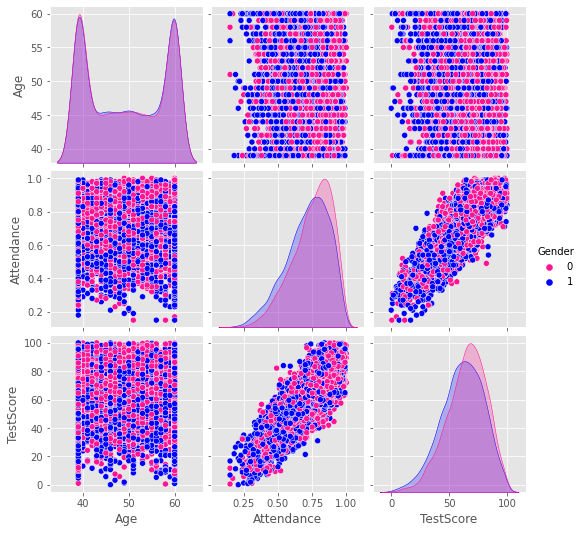

In [ ]:
plt.figure(figsize = (15, 10))
sns.pairplot(AI_data, hue = 'Gender', palette = {1: 'blue', 0: 'deeppink'})

- The plot shows a positive correlation between Students' Test Score and Attendance. As the Student's attendance increases, their Test Score also increases. 

- There is no correlation between Age and Attendance and between Age and Test Score.

- The Age distribution of both Genders is equittable.
- The female students (0) have a higher attendance rate than the male students (1).
- The female students generally scored higher than the male students.

# **Model Development**

Split the Students' data into test and train sets.

In [ ]:
# Normalised the TestScores using logarithm 

Y = np.log(AI_data['TestScore'])
X = AI_data.drop(columns = ['TestScore'])

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state = 10)

The differing scales of the raw data may impact these algorithms. Part of a requirement for a standardised data set is to have each attribute have a mean value of zero and a standard deviation of 1. I shall implement standardisation using pipelines and then use cross-validation to validate performance of all the algorithms.

In [ ]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR', LinearRegression())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()), ('RF', RandomForestRegressor())])))
pipelines.append(('ScaledGB', Pipeline([('Scaler', StandardScaler()), ('GB', GradientBoostingRegressor())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits = 3, random_state = 10)
    cv_results = cross_val_score(model, X_train, Y_train, cv = kfold, scoring = 'neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    notification = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(notification)

ScaledLR: -0.057081 (0.007395)
ScaledKNN: -0.061775 (0.007281)
ScaledRF: -0.063351 (0.009287)
ScaledGB: -0.055480 (0.009714)


From the output above, it looks like the Gradient Boosting Regressor performs the best using a scaled version of the data. From this point onward, I will build the regression algorithm using the Gradient Boosting Regressor.

In [ ]:
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
param_grid = dict(n_estimators = np.array([50, 100, 150, 200, 250, 300]))
model = GradientBoostingRegressor(random_state = 10)
kfold = KFold(n_splits = 3, random_state = 10)
grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring = 'neg_mean_squared_error', cv = kfold)
grid_result = grid.fit(X_train_scaled, Y_train)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('%f (%f) with: %r' % (mean, stdev, param))

print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

-0.053487 (0.009337) with: {'n_estimators': 50}
-0.055246 (0.009736) with: {'n_estimators': 100}
-0.056715 (0.009867) with: {'n_estimators': 150}
-0.057093 (0.009560) with: {'n_estimators': 200}
-0.057790 (0.009256) with: {'n_estimators': 250}
-0.058715 (0.008695) with: {'n_estimators': 300}
Best: -0.053487 using {'n_estimators': 50}


The best n_estimator configuration is 50 with the negative mean square error closest to 0.

### Finalise and validate model.

In [ ]:
model = GradientBoostingRegressor(random_state = 10, n_estimators = 50)
model.fit(X_train_scaled, Y_train)

X_test_rescaled = scaler.transform(X_test)
predictions = model.predict(X_test_rescaled)
mse = mean_squared_error(Y_test, predictions, squared = True)
rmse = mean_squared_error(Y_test, predictions, squared = False)
mse, rmse

(0.04111156914815338, 0.20275988051918303)

From the mean square error of 0.04111 between the prediction outputs vs the test data, the Gradient Boosting Regressor performed well. Important to note that the mean_square_error is calculated using the scaled data. It does not represent the error between the actual Test Scores and predicted Teas Scores. To better appreciate the outcome of the predictions, I look at the raw predicted values and the corresponding test data.

In [ ]:
predictions

array([3.95222579, 4.08100539, 4.14040613, ..., 4.3788898 , 3.99589507,
       3.95423381])

In [ ]:
compare_data = pd.DataFrame({'Prediction': predictions, 'Test Data' : Y_test})
compare_data.head(10)

,Prediction,Test Data
5292,3.952226,3.902579
567,4.081005,4.129551
8788,4.140406,4.066117
6729,4.292363,4.452485
4477,4.174532,4.096010
5225,4.418543,4.388009
4220,4.378890,4.280686
3582,4.246708,4.242333
368,4.206428,4.215086
9817,4.344359,4.399621


From the data frame output above, the difference between the predicted value and test data is pretty small. Take note that the data is scaled and log normalised. So, I have to inverse transform these data to see the actual values. To do that, I apply the exp function to the Prediction column.

In [ ]:
Y_test_actual = np.exp(Y_test)
Y_test_predicted = np.exp(predictions)

diff = abs(Y_test_actual - Y_test_predicted)

predicted_actual = pd.DataFrame({'Test Data': Y_test_actual, 'Predicted TestScore': Y_test_predicted, 'Difference': diff})
predicted_actual = predicted_actual.astype(int)
predicted_actual.head(10)

,Test Data,Predicted TestScore,Difference
5292,49,52,2
567,62,59,2
8788,58,62,4
6729,85,73,12
4477,60,65,4
5225,80,82,2
4220,72,79,7
3582,69,69,0
368,67,67,0
9817,81,77,4


# **The End!**



## **Seghe Momodu**


### November 26, 2020.